<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
0 -  Negative

1 - Postive

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [4]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Step 2 - Perform basic data quality checks

In [7]:
df.isna().sum()

,0
Review,0
Liked,0


In [8]:
df.duplicated().sum()

np.int64(4)

In [6]:
df["Liked"].value_counts()

,count
Liked,
1,500
0,500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Step 3 - Apply preprocessing on X
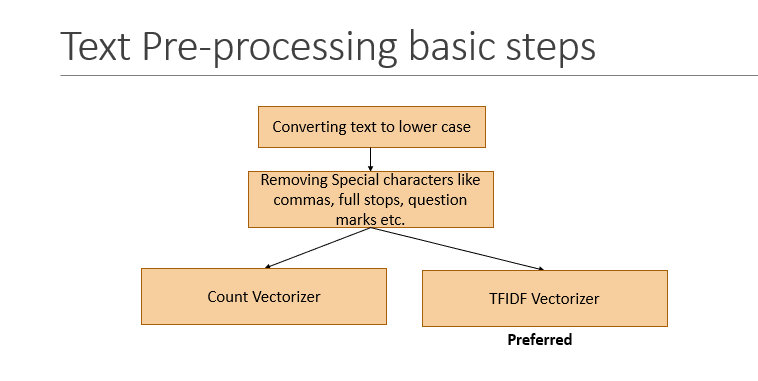

In [20]:
text = "Wow... Loved this place."
text = text.lower()
print(text)

wow... loved this place.


In [17]:
import re

In [21]:
text = re.sub("[^a-z ]", "", text)
text

'wow loved this place'

In [22]:
import re
def clean_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z ]", "", text)
  return text

In [23]:
clean_text("Wow... Loved this place.")

'wow loved this place'

In [24]:
df["cleaned"] = df["Review"].apply(clean_text)

In [25]:
df.head()

,Review,Liked,cleaned
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# Seperate X and Y(cleaned)

In [26]:
X = df["cleaned"]
Y = df["Liked"]

In [27]:
X.head()

,cleaned
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [28]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


# Apply preprocessing on X

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X)

TfidfVectorizer()

In [32]:
X_pre = tfidf.transform(X).toarray()
X_pre[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
X_pre.shape

(1000, 2046)

# TFIDF -> SVD (Singular Value Decomposition)
LSA - Latent Semantic Analysis

In [34]:
from sklearn.decomposition import TruncatedSVD

In [35]:
svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_pre)

TruncatedSVD(n_components=300, random_state=42)

In [36]:
X_pre_red = svd.transform(X_pre)
X_pre_red[0:5]

array([[ 1.14618006e-01,  1.90996583e-01,  2.98168712e-01, ...,
         7.31598920e-03,  7.83074387e-02, -6.53175625e-02],
       [ 2.00173430e-01,  6.07188983e-02,  1.03797385e-01, ...,
        -3.10389127e-05, -2.78263911e-02,  8.95524108e-04],
       [ 2.48212086e-01, -5.92449058e-02, -9.23442103e-02, ...,
         4.12000361e-03, -1.85930189e-02,  4.50102592e-02],
       [ 1.04146101e-01, -7.00547403e-03, -1.50216038e-03, ...,
         2.19353053e-02,  5.64119096e-02,  1.73306787e-02],
       [ 4.08330985e-01, -1.90139783e-01, -3.84652860e-02, ...,
        -2.76665813e-02, -2.15917720e-02,  3.11328622e-03]])

In [37]:
X_pre_red.shape

(1000, 300)

# Apply train test split

In [41]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [42]:
xtrain.shape

(800, 300)

In [43]:
xtest.shape

(200, 300)

# Build the neural network

In [40]:
X_pre_red.shape[1]

300

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(256, activation="relu", kernel_regularizer=l2(0.02)),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer=l2(0.02)),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ]
)

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,081 (430.00 KB)

 Trainable params: 110,081 (430.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [52]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60, callbacks=[es])

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4877 - loss: 8.5336 - val_accuracy: 0.5000 - val_loss: 5.7071
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5584 - loss: 5.0252 - val_accuracy: 0.4625 - val_loss: 3.3335
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5208 - loss: 2.9478 - val_accuracy: 0.4563 - val_loss: 2.0184
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5220 - loss: 1.8116 - val_accuracy: 0.4563 - val_loss: 1.3328
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5199 - loss: 1.2242 - val_accuracy: 0.4563 - val_loss: 0.9886
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5303 - loss: 0.9339 - val_accuracy: 0.4625 - val_loss: 0.8255
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5519 - loss: 0.7972 - val_accuracy: 0.4563 - val_loss: 0.7532
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5337 - loss: 0.7360 - val_accuracy: 0.4563 - val_loss

# Model evaluation

In [54]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9421 - loss: 0.4708
Train Loss : 0.4926
Train Accuracy : 0.9250


In [55]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7928 - loss: 0.6886
Test Loss : 0.6668
Test Accuracy : 0.7900


# Step 9 - Plot the learning curve

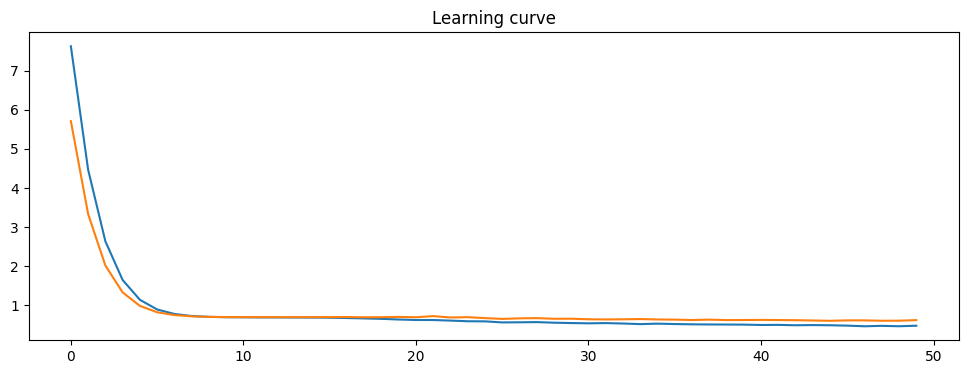

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Valdiation Loss")
plt.title("Learning curve")
plt.show()

# Out of sample prediction

In [58]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train accuracy : {train_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.4708
Train Loss : 0.4926
Train accuracy : 0.9250


In [60]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test accuracy : {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7928 - loss: 0.6886 
Test Loss : 0.6668
Test accuracy : 0.7900


In [63]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.14609675],
       [0.8812915 ],
       [0.04813152],
       [0.08107881],
       [0.9402144 ]], dtype=float32)

In [64]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_train[0:5]

[0, 1, 0, 0, 1]

In [65]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.6074487 ],
       [0.92023444],
       [0.9411761 ],
       [0.9184139 ],
       [0.5523203 ]], dtype=float32)

In [66]:
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[1, 1, 1, 1, 1]

# Out of sample prediction

In [67]:
tfidf

TfidfVectorizer()

In [68]:
svd

TruncatedSVD(n_components=300, random_state=42)

In [74]:
def predict_sentiment(text: str):
  text = clean_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  prob = model.predict(text_pre_red)
  pred = "Positive" if prob >=0.5 else "Negative"
  return pred, prob

In [75]:
predict_sentiment("Awesome just liked the taste!...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


('Positive', array([[0.80264246]], dtype=float32))

In [76]:
predict_sentiment("The service was very slow and i did not like it")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


('Negative', array([[0.0585687]], dtype=float32))

In [77]:
predict_sentiment("The taste of pizza was very good!...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


('Positive', array([[0.80466014]], dtype=float32))

# Out of sample predicion

In [79]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [80]:
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [81]:
model.save("sentiment_model.keras")

In [82]:
from keras.models import load_model

In [83]:
model = load_model("sentiment_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,245 (1.26 MB)

 Trainable params: 110,081 (430.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,164 (860.02 KB)